# Understand Your Data With Descriptive Statistics

by `Atwine Mugume Twinamatsiko`

## The Machine Learning Process:-

Credit to: `Jason Brownlee`


1. Take a peek at your raw data.
2. Review the dimensions of your dataset.
3. Review the data types of attributes in your data.
4. Summarize the distribution of instances across classes in your dataset.
5. Summarize your data using descriptive statistics.
6. Understand the relationships in your data using correlations.
7. Review the skew of the distributions of each attribute.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets' check which files we have in our folder
!ls

Jason Brownlee Practice.ipynb housing.csv
diabetes.csv


In [3]:
#let's read in the data
data = pd.read_csv('diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dimensions of Your Data
You must have a very good handle on how much data you have, both in terms of rows and columns.
- Too many rows and algorithms may take too long to train. Too few and perhaps you do
not have enough data to train the algorithms.
- Too many features and some algorithms can be distracted or suer poor performance due
to the curse of dimensionality.

In [4]:
#to check the dimensions we use the shape function from pandas
data.shape
#so we see that we have a few rows and columns so its easy to use pandas
#if not then we would use something like dask, or partition the data to
#to be read in batches

(768, 9)

## Data Type For Each Attribute

The type of each attribute is important. Strings may need to be converted to foating point values or integers to represent categorical or ordinal values. 

You can get an idea of the types of attributes by peeking at the raw data, as above. You can also list the data types used by the
DataFrame to characterize each attribute using the dtypes property.

In [5]:
#we do that by using dtypes
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Descriptive Statistics

Descriptive statistics can give you great insight into the shape of each attribute. Often you can create more summaries than you have time to review. The describe() function on the Pandas

DataFrame lists 8 statistical properties of each attribute. They are:

- Count.
- Mean.
- Standard Deviation.
- Minimum Value.
- 25th Percentile.
- 50th Percentile (Median).
- 75th Percentile.
- Maximum Value.

In [6]:
#for this we use the describe function on the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Class Distribution (Classiffication Only)
On classification problems you need to know how balanced the class values are. Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. You can quickly get an idea of the distribution of the class attribute in Pandas.

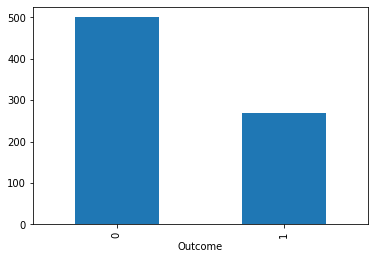

In [7]:
#this is the distribution of the class
#this only works if we are working with a classification problem not regression
#in this case we would have to use methods like smote to deal with the imbalance
data.groupby('Outcome').size().plot(kind='bar')

## Correlations Between Attributes
Correlation refers to the relationship between two variables and how they may or may notchange together. The most common method for calculating correlation is Pearson's Correlation Coefficient, that assumes a normal distribution of the attributes involved. 

A correlation of -1 or 1 shows a full negative or positive correlation respectively. Whereas a value of 0 shows no correlation at all. Some machine learning algorithms like linear and logistic regression can suffer poor performance if there are highly correlated attributes in your dataset. 

As such, it is a good idea to review all of the pairwise correlations of the attributes in your dataset. You can use the corr() function on the Pandas DataFrame to calculate a correlation matrix.

In [8]:
data.corr(method='pearson')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
#let us plot a heat map to show us the correlation of the data
import seaborn as sns

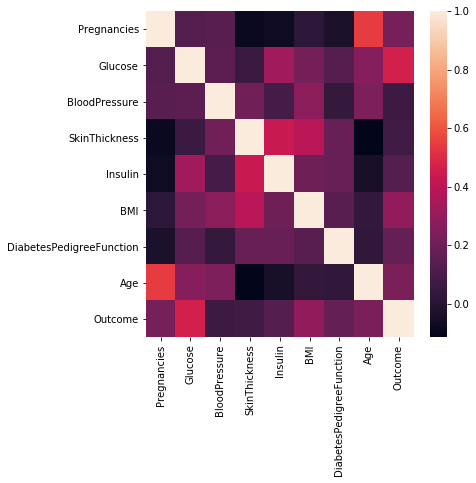

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(data.corr(method='pearson'))

In [11]:
#we can also check the correlation in regards to the outcome
#this is valuable especially when we are trying to build an ML algo for that outcome
data.corr(method='pearson')['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## Skew of Univariate Distributions
Skew refers to a distribution that is assumed Gaussian (normal or bell curve) that is shifted or squashed in one direction or another. Many machine learning algorithms assume a Gaussian distribution. Knowing that an attribute has a skew may allow you to perform data preparation to correct the skew and later improve the accuracy of your models. You can calculate the skew of each attribute using the skew() function on the Pandas DataFrame.

__If skewness value lies above +1 or below -1, data is highly skewed. If it lies between +0.5 to -0.5, it is moderately skewed. If the value is 0, then the data is symmetric__

### <u>Positively skewed data:</u>
If tail is on the right as that of the second image in the figure, it is right skewed data. It is also called positive skewed data.
Common transformations of this data include `square root, cube root, and log.`

#### Cube root transformation:
The cube root transformation involves converting x to $x^(1/3)$. This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data.

#### Square root transformation:
Applied to positive values only. Hence, observe the values of column before applying.

#### Logarithm transformation:
The logarithm, x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.


### <u>Negatively skewed data:</u>
If the tail is to the left of data, then it is called left skewed data. It is also called negatively skewed data.
Common transformations include square , cube root and logarithmic.
We will discuss what square transformation is as others are already discussed.

#### Square transformation:
The square, x to x², has a moderate effect on distribution shape and it could be used to reduce left skewness.

There is a great [article here](https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55)


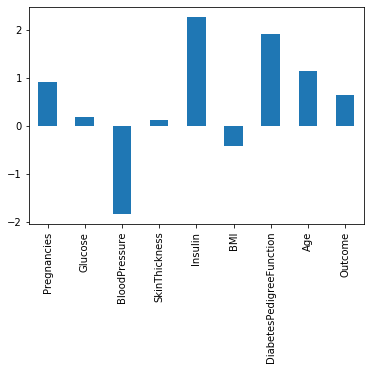

In [12]:
data.skew().plot(kind='bar')

## Tips To Remember

This section gives you some tips to remember when reviewing your data using summary statistics.
- Review the numbers. Generating the summary statistics is not enough. Take a moment to pause, read and really think about the numbers you are seeing.
- Ask why. Review your numbers and ask a lot of questions. How and why are you seeing specifc numbers. Think about how the numbers relate to the problem domain in general and specifc entities that observations relate to.
- Write down ideas. Write down your observations and ideas. Keep a small text file or note pad and jot down all of the ideas for how variables may relate, for what numbers mean, and ideas for techniques to try later. The things you write down now while the data is fresh will be very valuable later when you are trying to think up new things to try.

# Understand Your Data With Visualization

You must understand your data in order to get the best results from machine learning algorithms.
The fastest way to learn more about your data is to use data visualization.

### Univariate Plots
In this section we will look at three techniques that you can use to understand each attribute of your dataset independently.
- Histograms.
- Density Plots.
- Box and Whisker Plots.


#### Histograms

<Figure size 1080x1080 with 0 Axes>

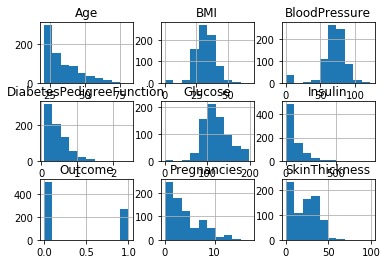

In [13]:
plt.figure(figsize=(15,15))
data.hist()
plt.show()

#### Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The
plots look like an abstracted histogram with a smooth curve drawn through the top of each bin,
much like your eye tried to do with the histograms.

<function matplotlib.pyplot.show(*args, **kw)>

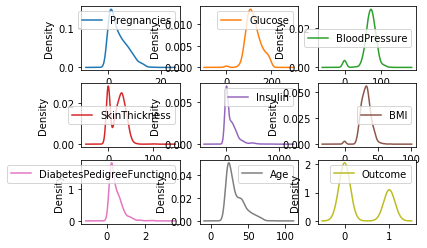

In [14]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show

#### Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short. Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of
the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers
show candidate outlier values (values that are 1.5 times greater than the size of spread of the
middle 50% of the data).

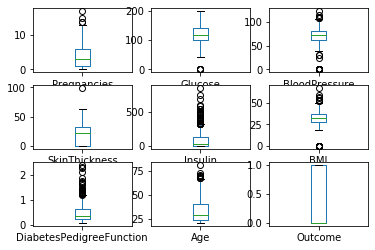

In [15]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

# Multivariate Plots
This section provides examples of two plots that show the interactions between multiple variables
in your dataset.
- Correlation Matrix Plot.
- Scatter Plot Matrix.

### Correlation Matrix Plot
Correlation gives an indication of how related the changes are between two variables. If two
variables change in the same direction they are positively correlated. If they change in opposite
directions together (one goes up, one goes down), then they are negatively correlated. You can
calculate the correlation between each pair of attributes. This is called a correlation matrix. You
can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables
in your data.

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

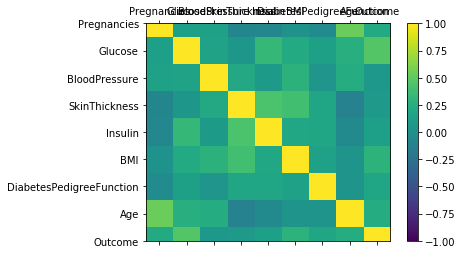

In [17]:

correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

## Scatter Plot Matrix
A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. You can create a scatter plot for each pair of attributes in your data.
Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful
for spotting structured relationships between variables, like whether you could summarize the
relationship between two variables with a line. Attributes with structured relationships may
also be correlated and good candidates for removal from your dataset.

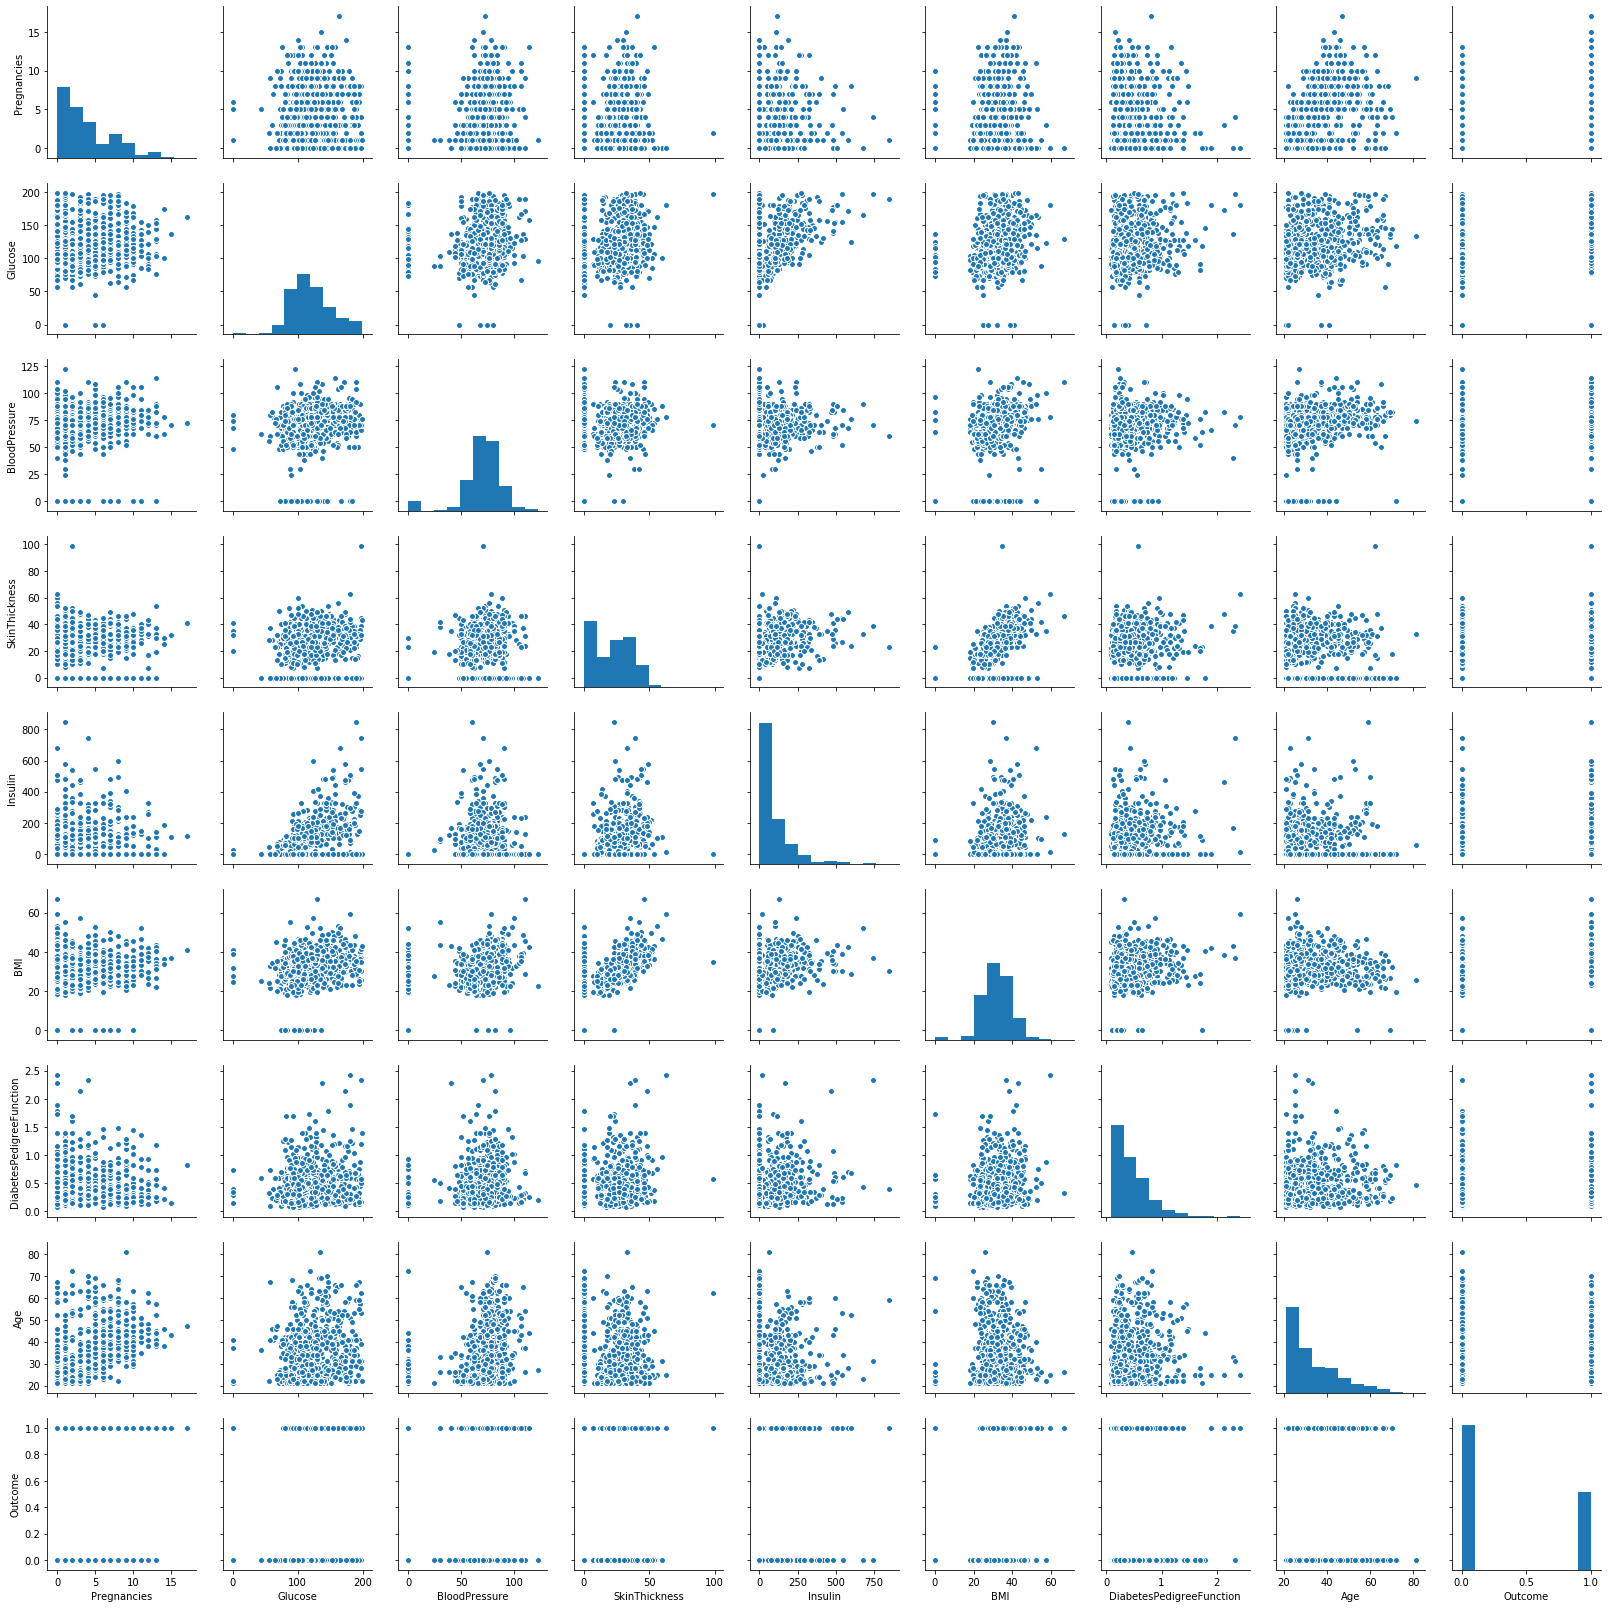

In [18]:
sns.pairplot(data)

# Prepare Your Data For Machine Learning

Many machine learning algorithms make assumptions about your data. It is often a very good
idea to prepare your data in such way to best expose the structure of the problem to the machine
learning algorithms that you intend to use. In this chapter you will discover how to prepare
your data for machine learning in Python using scikit-learn. After completing this lesson you
will know how to:

1. Rescale data.
2. Standardize data.
3. Normalize data.
4. Binarize data.


### Need For Data Pre-processing
You almost always need to pre-process your data. It is a required step. A difficulty is that
different algorithms make different assumptions about your data and may require different
transforms. Further, when you follow all of the rules and prepare your data, sometimes algorithms
can deliver better results without pre-processing.
Generally, I would recommend creating many different views and transforms of your data,
then exercise a handful of algorithms on each view of your dataset. This will help you to 
ush
out which data transforms might be better at exposing the structure of your problem in general.

The steps involved are as below:

- Split the dataset into the input and output variables for machine learning.
- Apply a pre-processing transform to the input variables.
- Summarize the data to show the change.

The scikit-learn library provides two standard idioms for transforming data. Each are useful
in dierent circumstances. The transforms are calculated in such a way that they can be applied
to your training data and any samples of data you may have in the future. The scikit-learn
documentation has some information on how to use various dierent pre-processing methods:

The Fit and Multiple Transform method is the preferred approach. You call the fit()
function to prepare the parameters of the transform once on your data. Then later you can use
the transform() function on the same data to prepare it for modeling and again on the test or
validation dataset or new data that you may see in the future. The Combined Fit-And-Transform
is a convenience that you can use for one o tasks. This might be useful if you are interested
in plotting or summarizing the transformed data.


## Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benet from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1. This is
useful for optimization algorithms used in the core of machine learning algorithms like gradient
descent. __`It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like k-Nearest Neighbors. You can rescale your data using scikit-learn using the MinMaxScaler class`__

In [19]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = data.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


## Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1. __`It is most suitable for techniques that assume a Gaussian distribution in the input variables and work better with rescaled data, such as linear regression, logistic regression and linear discriminate analysis.`__ You can standardize data using scikit-learn
with the StandardScaler class3.

In [20]:
from sklearn.preprocessing import StandardScaler

array2 = data.values
# separate array into input and output components
X = array2[:,0:8]
Y = array2[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


## Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).__`This pre-processing method can be useful for sparse datasets (lots of zeros) with attributes of varying scales when using algorithms that weight input values such as neural networks and algorithms that use distance measures such as k-Nearest Neighbors.`__ You can normalize data in Python with scikit-learn
using the Normalizer class4

In [21]:
from sklearn.preprocessing import Normalizer

array3 = data.values
# separate array into input and output components
X = array3[:,0:8]
Y = array3[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])
print(type(normalizedX))#print the data type so we can know what we are 
#working with in the dataset.

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]
<class 'numpy.ndarray'>


## Binarize Data (Make Binary)
You can transform your data using a binary threshold. All values above the threshold are
marked 1 and all equal to or below are marked as 0. This is called binarizing your data or
thresholding your data. It can be useful when you have probabilities that you want to make crisp
values. __`It is also useful when feature engineering and you want to add new features that indicate something meaningful.`__ You can create new binary attributes in Python using scikit-learn with
the Binarizer class.

In [22]:
# binarization
from sklearn.preprocessing import Binarizer

array4 = data.values
# separate array into input and output components
X = array4[:,0:8]
Y = array4[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


# Feature Selection For Machine
Learning
The data features that you use to train your machine learning models have a huge in
uence on
the performance you can achieve. Irrelevant or partially relevant features can negatively impact
model performance. In this chapter you will discover automatic feature selection techniques
that you can use to prepare your machine learning data in Python with scikit-learn. After
completing this lesson you will know how to use:

1. Univariate Selection.
2. Recursive Feature Elimination.
3. Principle Component Analysis.
4. Feature Importance.

## Feature Selection
Feature selection is a process where you automatically select those features in your data that
contribute most to the prediction variable or output in which you are interested. Having
irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three benets of performing feature selection
before modeling your data are:

- Reduces Overffitting: Less redundant data means less opportunity to make decisions based on noise.
- Improves Accuracy: Less misleading data means modeling accuracy improves.
- Reduces Training Time: Less data means that algorithms train faster.

### Univariate Selection
Statistical tests can be used to select those features that have the strongest relationship with
the output variable. The scikit-learn library provides the SelectKBest class2 that can be used
with a suite of different statistical tests to select a specific number of features. The example
below uses the chi-squared $(chi^2)$ statistical test for non-negative features to select 4 of the best
features from the Pima Indians onset of diabetes dataset.

You can see the scores for each attribute and the 4 attributes chosen (those with the highest
scores): plas, test, mass and age. I got the names for the chosen attributes by manually
mapping the index of the 4 highest scores to the index of the attribute names.

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

array_ = data.values
X = array_[:,0:8]
Y = array_[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


### Recursive Feature Elimination
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and
building a model on those attributes that remain. It uses the model accuracy to identify which
attributes (and combination of attributes) contribute the most to predicting the target attribute.
You can learn more about the RFE class3 in the scikit-learn documentation. The example below
uses RFE with the logistic regression algorithm to select the top 3 features. The choice of
algorithm does not matter too much as long as it is skillful and consistent.

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

array_1 = data.values
X = array_1[:,0:8]
Y = array_1[:,8]
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: ",  fit.n_features_)
print("Selected Features:",  fit.support_)
print("Feature Ranking: ",  fit.ranking_)

Num Features:  3
Selected Features: [ True False False False False  True  True False]
Feature Ranking:  [1 2 3 5 6 1 1 4]


### Principal Component Analysis
Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a
compressed form. Generally this is called a data reduction technique. A property of PCA is that
you can choose the number of dimensions or principal components in the transformed result. In
the example below, we use PCA and select 3 principal components. Learn more about the PCA
class in scikit-learn by reviewing the API4.

In [25]:
from sklearn.decomposition import PCA

array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: " , fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance:  [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


### Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance
of features. In the example below we construct a ExtraTreesClassifier classier for the Pima
Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class5
in the scikit-learn API.

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.107 0.262 0.1   0.078 0.068 0.133 0.12  0.132]


# Evaluate the Performance of Machine Learning Algorithms with Resampling

You need to know how well your algorithms perform on unseen data. The best way to evaluate
the performance of an algorithm would be to make predictions for new data to which you
already know the answers. The second best way is to use clever techniques from statistics called
resampling methods that allow you to make accurate estimates for how well your algorithm will
perform on new data. In this chapter you will discover how you can estimate the accuracy of
your machine learning algorithms using resampling methods in Python and scikit-learn on the
Pima Indians dataset. Let's get started.


### Evaluate Machine Learning Algorithms
Why can't you train your machine learning algorithm on your dataset and use predictions from
this same dataset to evaluate machine learning algorithms? The simple answer is overffitting.
Imagine an algorithm that remembers every observation it is shown during training. If you
evaluated your machine learning algorithm on the same dataset used to train the algorithm, then
an algorithm like this would have a perfect score on the training dataset. But the predictions it
made on new data would be terrible. We must evaluate our machine learning algorithms on
data that is not used to train the algorithm.
The evaluation is an estimate that we can use to talk about how well we think the algorithm
may actually do in practice. It is not a guarantee of performance. Once we estimate the
performance of our algorithm, we can then re-train the final algorithm on the entire training
dataset and get it ready for operational use. Next up we are going to look at four different
techniques that we can use to split up our training dataset and create useful estimates of
performance for our machine learning algorithms:

- Train and Test Sets.
- k-fold Cross Validation.
- Leave One Out Cross Validation.
- Repeated Random Test-Train Splits.

### Split into Train and Test Sets
The simplest method that we can use to evaluate the performance of a machine learning
algorithm is to use dierent training and testing datasets. We can take our original dataset and
split it into two parts. Train the algorithm on the rst part, make predictions on the second
part and evaluate the predictions against the expected results. The size of the split can depend
on the size and specics of your dataset, although it is common to use 67% of the data for
training and the remaining 33% for testing.
This algorithm evaluation technique is very fast. It is ideal for large datasets (millions of
records) where there is strong evidence that both splits of the data are representative of the
underlying problem. Because of the speed, it is useful to use this approach when the algorithm
you are investigating is slow to train. A downside of this technique is that it can have a high
variance. This means that dierences in the training and test dataset can result in meaningful
dierences in the estimate of accuracy. In the example below we split the Pima Indians dataset
into 67%/33% splits for training and test and evaluate the accuracy of a Logistic Regression
model.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: ",  (result*100.0))

Accuracy:  75.59055118110236


We can see that the estimated accuracy for the model was approximately 75%. Note that
in addition to specifying the size of the split, we also specify the random seed. Because the
split of the data is random, we want to ensure that the results are reproducible. By specifying
the random seed we ensure that we get the same random numbers each time we run the code
and in turn the same split of data. This is important if we want to compare this result to
the estimated accuracy of another machine learning algorithm or the same algorithm with a
different configuration. To ensure the comparison was apples-for-apples, we must ensure that
they are trained and tested on exactly the same data.

## K-fold Cross Validation
Cross validation is an approach that you can use to estimate the performance of a machine
learning algorithm with less variance than a single train-test set split. It works by splitting
the dataset into k-parts (e.g. k = 5 or k = 10). Each split of the data is called a fold. The
algorithm is trained on k 􀀀 1 folds with one held back and tested on the held back fold. This is
repeated so that each fold of the dataset is given a chance to be the held back test set. After
running cross validation you end up with k dierent performance scores that you can summarize
using a mean and a standard deviation.
The result is a more reliable estimate of the performance of the algorithm on new data. It is
more accurate because the algorithm is trained and evaluated multiple times on different data.
The choice of k must allow the size of each test partition to be large enough to be a reasonable
sample of the problem, whilst allowing enough repetitions of the train-test evaluation of the
algorithm to provide a fair estimate of the algorithms performance on unseen data. For modest
sized datasets in the thousands or tens of thousands of records, k values of 3, 5 and 10 are
common. In the example below we use 10-fold cross validation.

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

array = data.values
X = array[:,0:8]
Y = array[:,8]

num_folds = 10 #number of folds to use
seed = 7 #reproducibility

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(f"Accuracy:", (results.mean()*100.0, results.std()*100.0))

Accuracy: (76.95146958304852, 4.841051924567195)


## Leave One Out Cross Validation
You can configure cross validation so that the size of the fold is 1 (k is set to the number of
observations in your dataset). This variation of cross validation is called leave-one-out cross
validation. The result is a large number of performance measures that can be summarized in
an effort to give a more reasonable estimate of the accuracy of your model on unseen data.
A downside is that it can be a computationally more expensive procedure than k-fold cross
validation. In the example below we use leave-one-out cross validation.

In [29]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=loocv)
print("Accuracy:",  (results.mean()*100.0, results.std()*100.0))

Accuracy: (76.82291666666666, 42.1963403803346)


## Repeated Random Test-Train Splits
Another variation on k-fold cross validation is to create a random split of the data like the
train/test split described above, but repeat the process of splitting and evaluation of the
algorithm multiple times, like cross validation. This has the speed of using a train/test split and
the reduction in variance in the estimated performance of k-fold cross validation. You can also
repeat the process many more times as needed to improve the accuracy. A down side is that
repetitions may include much of the same data in the train or the test split from run to run,
introducing redundancy into the evaluation. The example below splits the data into a 67%/33%
train/test split and repeats the process 10 times.

In [30]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

array = data.values
X = array[:,0:8]
Y = array[:,8]
n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: " , (results.mean()*100.0, results.std()*100.0))

Accuracy:  (76.49606299212599, 1.6983980007970874)


# What Techniques to Use When
This section lists some tips to consider what resampling technique to use in dierent circum-
stances.
- Generally k-fold cross validation is the gold standard for evaluating the performance of amachine learning algorithm on unseen data with k set to 3, 5, or 10.
- Using a train/test split is good for speed when using a slow algorithm and producesperformance estimates with lower bias when using large datasets.
- Techniques like leave-one-out cross validation and repeated random splits can be usefulintermediates when trying to balance variance in the estimated performance, modeltraining speed and dataset size.

The best advice is to experiment and find a technique for your problem that is fast and
produces reasonable estimates of performance that you can use to make decisions. If in doubt,
use 10-fold cross validation.

# Machine Learning Algorithm Performance Metrics

The metrics that you choose to evaluate your machine learning algorithms are very important.
Choice of metrics in
uences how the performance of machine learning algorithms is measured
and compared. They in
uence how you weight the importance of different characteristics in
the results and your ultimate choice of which algorithm to choose.

## Algorithm Evaluation Metrics
In this lesson, various dierent algorithm evaluation metrics are demonstrated for both classi-
cation and regression type machine learning problems. In each recipe, the dataset is downloaded
directly from the UCI Machine Learning repository.
- For classication metrics, the Pima Indians onset of diabetes dataset is used as demon-stration. This is a binary classication problem where all of the input variables are numeric.
- For regression metrics, the Boston House Price dataset is used as demonstration. this is a regression problem where all of the input variables are also numeric.

All recipes evaluate the same algorithms, Logistic Regression for classiffication and Linear
Regression for the regression problems. A 10-fold cross validation test harness is used to
demonstrate each metric, because this is the most likely scenario you will use when employing
different algorithm evaluation metrics.

A caveat in these recipes is the cross validation.cross val score function1 used to
report the performance in each recipe. It does allow the use of different scoring metrics
that will be discussed, but all scores are reported so that they can be sorted in ascending
order (largest score is best). Some evaluation metrics (like mean squared error) are naturally
descending scores (the smallest score is best) and as such are reported as negative by the cross validation.cross val score() function. This is important to note, because some
scores will be reported as negative that by denition can never be negative. I will remind you
about this caveat as we work through the lesson.
You can learn more about machine learning algorithm performance metrics supported by
scikit-learn on the page Model evaluation: quantifying the quality of predictions2. Let's get on
with the evaluation metrics.

## Classiffication Metrics
Classiffication problems are perhaps the most common type of machine learning problem and as
such there are a myriad of metrics that can be used to evaluate predictions for these problems.
In this section we will review how to use the following metrics:

- Classiffication Accuracy.
- Logarithmic Loss.
- Area Under ROC Curve.
- Confusion Matrix.
- Classiffication Report.

### Classiffication Accuracy
Classiffication accuracy is the number of correct predictions made as a ratio of all predictions
made. This is the most common evaluation metric for classication problems, it is also the most
misused. It is really only suitable when there are an equal number of observations in each class
(which is rarely the case) and that all predictions and prediction errors are equally important,
which is often not the case. Below is an example of calculating classiffication accuracy.

In [31]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy:", (results.mean(), results.std()))

Accuracy: (0.7695146958304853, 0.04841051924567195)


## Logarithmic Loss
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities
of membership to a given class. The scalar probability between 0 and 1 can be seen as a measure
of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are
rewarded or punished proportionally to the confidence of the prediction. Below is an example
of calculating logloss for Logistic regression predictions on the Pima Indians onset of diabetes
dataset.

In [32]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss:",  (results.mean(), results.std()))

Logloss: (-0.4925542125228744, 0.04700518583644249)


## Area Under ROC Curve
Area under ROC Curve (or AUC for short) is a performance metric for binary classiffication
problems. The AUC represents a model's ability to discriminate between positive and negative
classes. An area of 1.0 represents a model that made all predictions perfectly. An area of
0.5 represents a model that is as good as random. ROC can be broken down into sensitivity
and specificity. A binary classiffication problem is really a trade-off between sensitivity and
specificity.

- Sensitivity is the true positive rate also called the recall. It is the number of instances from the positive (first) class that actually predicted correctly.

- Specificity is also called the true negative rate. Is the number of instances from the negative (second) class that were actually predicted correctly.

In [33]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC:", (results.mean(), results.std()))

AUC: (0.8235745353220848, 0.040840334234829315)


## Confusion Matrix
The confusion matrix is a handy presentation of the accuracy of a model with two or more
classes. The table presents predictions on the x-axis and accuracy outcomes on the y-axis. The
cells of the table are the number of predictions made by a machine learning algorithm. For
example, a machine learning algorithm can predict 0 or 1 and each prediction may actually have
been a 0 or 1. Predictions for 0 that were actually 0 appear in the cell for prediction = 0 and
actual = 0, whereas predictions for 0 that were actually 1 appear in the cell for prediction = 0
and actual = 1. And so on. Below is an example of calculating a confusion matrix for a set of
predictions by a Logistic Regression on the Pima Indians onset of diabetes dataset.

In [34]:
from sklearn.metrics import confusion_matrix

array = data.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)

model = LogisticRegression()
model.fit(X_train, Y_train)

predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


## Classiffication Report
The scikit-learn library provides a convenience report when working on classiffication prob-
lems to give you a quick idea of the accuracy of a model using a number of measures. The
classification report() function displays the precision, recall, F1-score and support for each
class. The example below demonstrates the report on the binary classication problem.

In [35]:
from sklearn.metrics import classification_report

array = data.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



## Regression Metrics
In this section will review 3 of the most common metrics for evaluating predictions on regression
machine learning problems:
- Mean Absolute Error.
- Mean Squared Error.
- R2.

## Mean Absolute Error
The Mean Absolute Error (or MAE) is the sum of the absolute dierences between predictions
and actual values. It gives an idea of how wrong the predictions were. The measure gives an
idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting).
The example below demonstrates calculating mean absolute error on the Boston house price
dataset.

In [36]:
from pandas import read_csv
from sklearn.linear_model import LinearRegression

filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE:",(results.mean(), results.std()))

MAE: (-4.004946635323998, 2.0835992687095275)


## Mean Squared Error
The Mean Squared Error (or MSE) is much like the mean absolute error in that it provides a
gross idea of the magnitude of error. Taking the square root of the mean squared error converts
the units back to the original units of the output variable and can be meaningful for description
and presentation. This is called the Root Mean Squared Error (or RMSE). The example below
provides a demonstration of calculating mean squared error.

In [37]:
# Cross Validation Regression MSE
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE:",(results.mean(), results.std()))

MSE: (-34.705255944524865, 45.57399920030862)


This metric too is inverted so that the results are increasing. Remember to take the absolute
value before taking the square root if you are interested in calculating the RMSE.

## R2 Metric
The R2 (or R Squared) metric provides an indication of the goodness of fit of a set of predictions
to the actual values. In statistical literature this measure is called the coefficient of determination.
This is a value between 0 and 1 for no-fit and perfect fit respectively. The example below
provides a demonstration of calculating the mean R2 for a set of predictions.

In [38]:
# Cross Validation Regression R^2
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]

kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2:",(results.mean(), results.std()))

R^2: (0.20252899006055886, 0.5952960169512295)


# Spot-Check Classiffication Algorithms
Spot-checking is a way of discovering which algorithms perform well on your machine learning
problem. You cannot know which algorithms are best suited to your problem beforehand. You
must trial a number of methods and focus attention on those that prove themselves the most
promising. In this chapter you will discover six machine learning algorithms that you can use
when spot-checking your classiffication problem in Python with scikit-learn. After completing
this lesson you will know:

1. How to spot-check machine learning algorithms on a classication problem.
2. How to spot-check two linear classication algorithms.
3. How to spot-check four nonlinear classication algorithms.

### Algorithm Spot-Checking
You cannot know which algorithm will work best on your dataset beforehand. You must use
trial and error to discover a shortlist of algorithms that do well on your problem that you can
then double down on and tune further. I call this process spot-checking.
The question is not: What algorithm should I use on my dataset? Instead it is: What
algorithms should I spot-check on my dataset? You can guess at what algorithms might do
well on your dataset, and this can be a good starting point. I recommend trying a mixture of
algorithms and see what is good at picking out the structure in your data. Below are some
suggestions when spot-checking algorithms on your dataset:

- Try a mixture of algorithm representations (e.g. instances and trees).

- Try a mixture of learning algorithms (e.g. dierent algorithms for learning the same type of representation).

- Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).


#### Algorithms Overview
We are going to take a look at six classication algorithms that you can spot-check on your
dataset. Starting with two linear machine learning algorithms:
- Logistic Regression.
- Linear Discriminant Analysis.

Then looking at four nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Naive Bayes.
- Classication and Regression Trees.
- Support Vector Machines.

#### Linear Machine Learning Algorithms
This section demonstrates minimal recipes for how to use two linear machine learning algorithms:
`logistic regression` and `linear discriminant analysis`.

#### Logistic Regression
Logistic regression assumes a Gaussian distribution for the numeric input variables and can model binary classiffication problems. You can construct a logistic regression model using the
LogisticRegression class.

In [39]:
# Logistic Regression Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7695146958304853


#### Linear Discriminant Analysis
Linear Discriminant Analysis or LDA is a statistical technique for binary and multiclass
classiffication. It too assumes a Gaussian distribution for the numerical input variables. You can
construct an LDA model using the LinearDiscriminantAnalysis class

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


## Nonlinear Machine Learning Algorithms
This section demonstrates minimal recipes for how to use 4 nonlinear machine learning algorithms.

### k-Nearest Neighbors
The k-Nearest Neighbors algorithm (or KNN) uses a distance metric to find the k most similar
instances in the training data for a new instance and takes the mean outcome of the neighbors
as the prediction. You can construct a KNN model using the KNeighborsClassifier class.

In [41]:
from sklearn.neighbors import KNeighborsClassifier

array = data.values
X = array[:,0:8]
Y = array[:,8]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7265550239234451


### Naive Bayes
Naive Bayes calculates the probability of each class and the conditional probability of each class
given each input value. These probabilities are estimated for new data and multiplied together,
assuming that they are all independent (a simple or naive assumption). When working with
real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for
input variables using the Gaussian Probability Density Function. You can construct a Naive
Bayes model using the GaussianNB class4.

In [42]:
from sklearn.naive_bayes import GaussianNB
array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7551777170198223


## Classiffication and Regression Trees
Classiffication and Regression Trees (CART or just decision trees) construct a binary tree from
the training data. Split points are chosen greedily by evaluating each attribute and each value
of each attribute in the training data in order to minimize a cost function (like the Gini index).
You can construct a CART model using the DecisionTreeClassifier class

In [43]:
from sklearn.tree import DecisionTreeClassifier
array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6900205058099795


## Support Vector Machines
Support Vector Machines (or SVM) seek a line that best separates two classes. Those data
instances that are closest to the line that best separates the classes are called support vectors
and in
uence where the line is placed. SVM has been extended to support multiple classes.
Of particular importance is the use of dierent kernel functions via the kernel parameter.

In [44]:
from sklearn.svm import SVC

array = data.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6510252904989747


# Spot-Check Regression Algorithms

- Linear Regression.
- Ridge Regression.
- LASSO Linear Regression.
- Elastic Net Regression.

Then looking at three nonlinear machine learning algorithms:
- k-Nearest Neighbors.
- Classication and Regression Trees.
- Support Vector Machines.

### Linear Regression
Linear regression assumes that the input variables have a Gaussian distribution. It is also
assumed that input variables are relevant to the output variable and that they are not highly
correlated with each other (a problem called collinearity). You can construct a linear regression
model using the LinearRegression class.

In [45]:
from sklearn.linear_model import LinearRegression
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.705255944524865


### Ridge Regression
Ridge regression is an extension of linear regression where the loss function is modified to
minimize the complexity of the model measured as the sum squared value of the coefficient
values (also called the L2-norm). You can construct a ridge regression model by using the Ridge
class2.

In [46]:
from sklearn.linear_model import Ridge
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-34.078246209259305


# Nonlinear Machine Learning Algorithms
This section provides examples of how to use three dierent nonlinear machine learning algorithms
for regression in Python with scikit-learn.

### K-Nearest Neighbors
The k-Nearest Neighbors algorithm (or KNN) locates the k most similar instances in the
training dataset for a new data instance. From the k neighbors, a mean or median output
variable is taken as the prediction. Of note is the distance metric used (the metric argument).
The Minkowski distance is used by default, which is a generalization of both the Euclidean
distance (used when all inputs have the same scale) and Manhattan distance (for when the
scales of the input variables dier). You can construct a KNN model for regression using the
KNeighborsRegressor class5.

In [47]:
from sklearn.neighbors import KNeighborsRegressor
filename = 'housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataframe = read_csv(filename, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

-107.28683898039215


# Compare Machine Learning Algorithms
It is important to compare the performance of multiple dierent machine learning algorithms
consistently. In this chapter you will discover how you can create a test harness to compare
multiple different machine learning algorithms in Python with scikit-learn. You can use this
test harness as a template on your own machine learning problems and add more and different
algorithms to compare. After completing this lesson you will know:

1. How to formulate an experiment to directly compare machine learning algorithms.
2. A reusable template for evaluating the performance of multiple algorithms on one dataset.
3. How to report and visualize the results when comparing algorithm performance.


### Choose The Best Machine Learning Model
When you work on a machine learning project, you often end up with multiple good models
to choose from. Each model will have different performance characteristics. Using resampling
methods like cross validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from
the suite of models that you have created.
When you have a new dataset, it is a good idea to visualize the data using different techniques
in order to look at the data from dierent perspectives. The same idea applies to model selection.
You should use a number of dierent ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalize. A way to do this is
to use visualization methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In the next section you will discover exactly how you can do
that in Python with scikit-learn.


### Compare Machine Learning Algorithms Consistently
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In the example below six different classiffication
algorithms are compared on a single dataset:

- Logistic Regression.
- Linear Discriminant Analysis.
- k-Nearest Neighbors.
- Classiffication and Regression Trees.
- Naive Bayes.
- Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and
eight numeric input variables of varying scales. The 10-fold cross validation procedure is used to
evaluate each algorithm, importantly congured with the same random seed to ensure that the
same splits to the training data are performed and that each algorithm is evaluated in precisely
the same way. Each algorithm is given a short name, useful for summarizing results afterward.

('LR', 0.7695146958304853, 0.04841051924567195)
('LDA', 0.773462064251538, 0.05159180390446138)
('KNN', 0.7265550239234451, 0.06182131406705549)
('CART', 0.6821941216678058, 0.0587306826895643)
('NB', 0.7551777170198223, 0.04276593954064409)
('SVM', 0.6510252904989747, 0.07214083485055327)


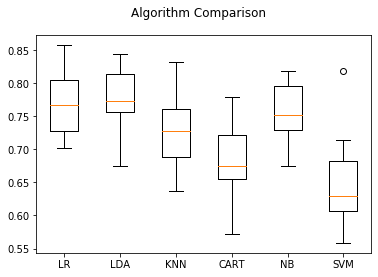

In [48]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

#split the dataset 
X = array[:,0:8]
Y = array[:,8]

# prepare models and add them to a list
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

From these results, it would suggest that both logistic regression and linear discriminant analysis are perhaps worthy of further study on this problem.

# Automate Machine Learning Workflows with Pipelines

There are standard work
ows in a machine learning project that can be automated. In Python
scikit-learn, Pipelines help to clearly define and automate these work
ows. In this chapter you
will discover Pipelines in scikit-learn and how you can automate common machine learning
work
ows. After completing this lesson you will know:

1. How to use pipelines to minimize data leakage.
2. How to construct a data preparation and modeling pipeline.
3. How to construct a feature extraction and modeling pipeline.

### Automating Machine Learning Workflows
There are standard work
ows in applied machine learning. Standard because they overcome
common problems like data leakage in your test harness. Python scikit-learn provides a Pipeline
utility to help automate machine learning work
ows. Pipelines work by allowing for a linear
sequence of data transforms to be chained together culminating in a modeling process that can
be evaluated.

The goal is to ensure that all of the steps in the pipeline are constrained to the data available
for the evaluation, such as the training dataset or each fold of the cross validation procedure.
You can learn more about Pipelines in scikit-learn by reading the Pipeline section1 of the user
guide. You can also review the API documentation for the Pipeline and FeatureUnion classes
and the pipeline module2.

### Data Preparation and Modeling Pipeline
An easy trap to fall into in applied machine learning is leaking data from your training dataset
to your test dataset. To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation. Data preparation is one easy way to leak
knowledge of the whole training dataset to the algorithm. For example, preparing your data
using normalization or standardization on the entire training dataset before learning would not
be a valid test because the training dataset would have been in
uenced by the scale of the data
in the test set.


Pipelines help you prevent data leakage in your test harness by ensuring that data preparation
like standardization is constrained to each fold of your cross validation procedure. The example
below demonstrates this important data preparation and model evaluation work
ow on the
Pima Indians onset of diabetes dataset. The pipeline is dened with two steps:

1. Standardize the data.
2. Learn a Linear Discriminant Analysis model.

The pipeline is then evaluated using 10-fold cross validation.

In [49]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load data

dataframe = read_csv('diabetes.csv')
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)


# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.773462064251538


Notice how we create a Python list of steps that are provided to the Pipeline for process
the data. Also notice how the Pipeline itself is treated like an estimator and is evaluated in its
entirety by the k-fold cross validation procedure. Running the example provides a summary of
accuracy of the setup on the dataset.


## Feature Extraction and Modeling Pipeline
Feature extraction is another procedure that is susceptible to data leakage. Like data preparation,
feature extraction procedures must be restricted to the data in your training dataset. The
pipeline provides a handy tool called the FeatureUnion which allows the results of multiple
feature selection and extraction procedures to be combined into a larger dataset on which a
model can be trained. Importantly, all the feature extraction and the feature union occurs
within each fold of the cross validation procedure. The example below demonstrates the pipeline
defined with four steps:

1. Feature Extraction with Principal Component Analysis (3 features).
2. Feature Extraction with Statistical Selection (6 features).
3. Feature Union.
4. Learn a Logistic Regression Model.

The pipeline is then evaluated using 10-fold cross validation.

In [50]:
# Create a pipeline that extracts features from the data then creates a model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7760423786739576


# Improve Performance with Ensembles

Ensembles can give you a boost in accuracy on your dataset. In this chapter you will discover
how you can create some of the most powerful types of ensembles in Python using scikit-learn.
This lesson will step you through Boosting, Bagging and Majority Voting and show you how you
can continue to ratchet up the accuracy of the models on your own datasets. After completing
this lesson you will know:

1. How to use bagging ensemble methods such as bagged decision trees, random forest and extra trees.
2. How to use boosting ensemble methods such as AdaBoost and stochastic gradient boosting.
3. How to use voting ensemble methods to combine the predictions from multiple algorithms.

### Combine Models Into Ensemble Predictions
The three most popular methods for combining the predictions from different models are:

- Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the sequence of models.
- Voting. Building multiple models (typically of diering types) and simple statistics (like calculating the mean) are used to combine predictions.

This assumes you are generally familiar with machine learning algorithms and ensemble
methods and will not go into the details of how the algorithms work or their parameters.
The Pima Indians onset of Diabetes dataset is used to demonstrate each algorithm. Each
ensemble algorithm is demonstrated using 10-fold cross validation and the classiffication accuracy
performance metric.


### Bagging Algorithms
Bootstrap Aggregation (or Bagging) involves taking multiple samples from your training dataset
(with replacement) and training a model for each sample. The nal output prediction is averaged
across the predictions of all of the sub-models. The three bagging models covered in this section
are as follows:

- Bagged Decision Trees.
- Random Forest.
- Extra Trees.

### Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are
decision trees, often constructed without pruning. In the example below is an example
of using the BaggingClassifier with the Classication and Regression Trees algorithm
(DecisionTreeClassifier1). A total of 100 trees are created.

In [51]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#let's read the data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

#split the data in portions
X = array[:,0:8]
Y = array[:,8]
seed = 7 #duplication

#split according to cross validation
kfold = KFold(n_splits=10, random_state=seed)

#initialize the model
cart = DecisionTreeClassifier()

#bagging
num_trees = 250

#model
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.770762132604238


### Random Forest
Random Forests is an extension of bagged decision trees. Samples of the training dataset are
taken with replacement, but the trees are constructed in a way that reduces the correlation
between individual classiffiers. Specifically, rather than greedily choosing the best split point in
the construction of each tree, only a random subset of features are considered for each split. You
can construct a Random Forest model for classiffication using the RandomForestClassifier
class2. The example below demonstrates using Random Forest for classiffication with 100 trees
and split points chosen from a random selection of 3 features.

In [52]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


#let's read the data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

num_trees = 1000

max_features = 3

kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7681647300068353


### Extra Trees
Extra Trees are another modication of bagging where random trees are constructed from
samples of the training dataset. You can construct an Extra Trees model for classiffication using
the ExtraTreesClassifier class3. The example below provides a demonstration of extra trees
with the number of trees set to 100 and splits chosen from 7 random features.

In [53]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

#let's read the data
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values


X = array[:,0:8]
Y = array[:,8]

num_trees = 100
max_features = 7

kfold = KFold(n_splits=10, random_state=7)

model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.7642686261107314


# Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes
of the models before them in the sequence. Once created, the models make predictions which
may be weighted by their demonstrated accuracy and the results are combined to create a nal
output prediction. The two most common boosting ensemble machine learning algorithms are:

- AdaBoost.
- Stochastic Gradient Boosting.


### AdaBoost
AdaBoost was perhaps the rst successful boosting ensemble algorithm. It generally works
by weighting instances in the dataset by how easy or dicult they are to classify, allowing
the algorithm to pay or less attention to them in the construction of subsequent models. You
can construct an AdaBoost model for classication using the AdaBoostClassifier class4. The
example below demonstrates the construction of 30 decision trees in sequence using the AdaBoost
algorithm.

In [54]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

num_trees = 30
seed=7

kfold = KFold(n_splits=10, random_state=seed)

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())

0.760457963089542


## Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most
sophisticated ensemble techniques. It is also a technique that is proving to be perhaps one of
the best techniques available for improving performance via ensembles. You can construct a
Gradient Boosting model for classiffication using the GradientBoostingClassifier class5. The
example below demonstrates Stochastic Gradient Boosting for classication with 100 trees.

In [55]:
# Stochastic Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7669002050580999


## XGB

In [56]:
# Stochastic X Gradient Boosting Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

seed = 7
num_trees = 100

kfold = KFold(n_splits=10, random_state=seed)
model = XGBClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7668660287081339


### Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning
algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classiffier can then be used to wrap your models and average the predictions of the
sub-models when asked to make predictions for new data. The predictions of the sub-models can
be weighted, but specifying the weights for classiffiers manually or even heuristically is difficult.
More advanced methods can learn how to best weight the predictions from sub-models, but this
is called stacking (stacked aggregation) and is currently not provided in scikit-learn.
You can create a voting ensemble model for classiffication using the VotingClassifier
class6. The code below provides an example of combining the predictions of logistic regression,
classiffication and regression trees and support vector machines together for a classiffication
problem.

In [64]:
# Voting Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

model4 = XGBClassifier()
estimators.append(('xgb', model4))

model5 = RandomForestClassifier()
estimators.append(('rfc', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7642515379357484


## Finalize Your Model with pickle
Pickle is the standard way of serializing objects in Python. You can use the pickle1 operation
to serialize your machine learning algorithms and save the serialized format to a file. Later you
can load this file to deserialize your model and use it to make new predictions. The example
below demonstrates how you can train a logistic regression model on the Pima Indians onset of
diabetes dataset, save the model to file and load it to make predictions on the unseen test set.

In [67]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model1.sav'
dump(model, open(filename, 'wb'))

# some time later...
# load the model from disk
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


## Finalize Your Model with Joblib
The Joblib2 library is part of the SciPy ecosystem and provides utilities for pipelining Python
jobs. It provides utilities for saving and loading Python objects that make use of NumPy data
structures, efficiently3. This can be useful for some machine learning algorithms that require a
lot of parameters or store the entire dataset (e.g. k-Nearest Neighbors). The example below
demonstrates how you can train a logistic regression model on the Pima Indians onset of diabetes
dataset, save the model to file using Joblib and load it to make predictions on the unseen test
set.

In [66]:
# Save Model Using joblib
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
filename = 'diabetes.csv'
dataframe = read_csv(filename)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)

# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)

# save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

# some time later...
# load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_test, Y_test)
print(result)

0.7559055118110236


/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Template Summary
Below is the project template that you can use in your machine learning projects in Python.

In [68]:
# Python Project Template
# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use